# Обзор Matplotlib

## Introduction

Matplotlib — библиотека на языке программирования Python для визуализации данных двумерной (2D) графикой (3D графика также поддерживается). Получаемые изображения могут быть использованы в качестве иллюстраций в публикациях[4].

Matplotlib написан и поддерживался в основном Джоном Хантером (англ. John Hunter) и распространяется на условиях BSD-подобной лицензии. Генерируемые в различных форматах изображения могут быть использованы в интерактивной графике, в научных публикациях, графическом интерфейсе пользователя, веб-приложениях, где требуется построение диаграмм (англ. plotting)[5][6]. В документации автор признаётся, что Matplotlib начинался с подражания графическим командам MATLAB, но является независимым от него проектом

Веб-сайт: http://matplotlib.org/

## Установка 

Для установки используйте пакетный менеджер:

    conda install matplotlib
или
    pip install matplotlib
    
## Импорт

In [2]:
import matplotlib.pyplot as plt

Для отображения графиков в notebook'е введите

In [8]:
%matplotlib inline

Для отображения графиков в отрыве от jupyter notebook используйте **plt.show()** после всех команд для вывода графиков.

# Базовый пример создания графика в функциональном стиле


### Example

В отличии от pandas, matplotlib может строить графики из обычных списков или массивов numpy.

** Создадим массив numpy:**

In [19]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x**2

In [8]:
x

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

In [10]:
y

array([  0.  ,   0.25,   1.  ,   2.25,   4.  ,   6.25,   9.  ,  12.25,
        16.  ,  20.25,  25.  ])

## Базовые комманды matplotlib


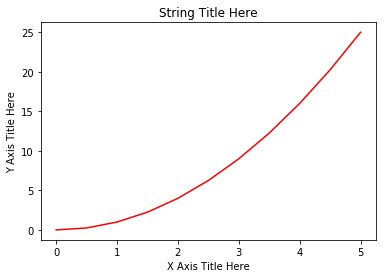

In [18]:
plt.plot(x, y, 'r')  #  r - значит red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

## Несколько графиков на одном полотне

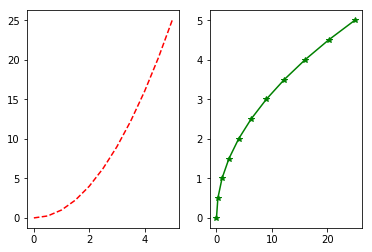

In [17]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')  #  Магия
plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*-')

___
# Объектно-ориентированный стиль создания графиков

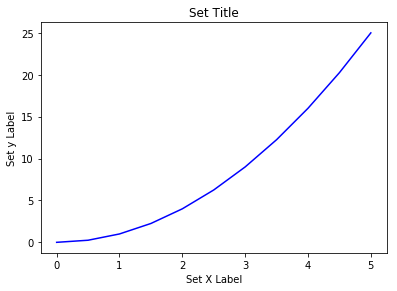

In [12]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

Теперь мы имеем полный контроль над осями графика:

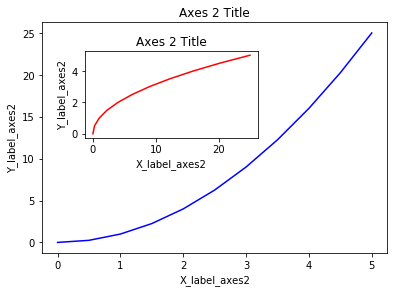

In [14]:
# Создадим пустое полотно
fig = plt.figure()

# Оси задаются через список из 4-х чисел: координаты левого нижнего угла, ширина и высота.
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title')

## subplots()

То же, что и plt.figure(), только возвращяет сразу кортеж с фигурой и осями:

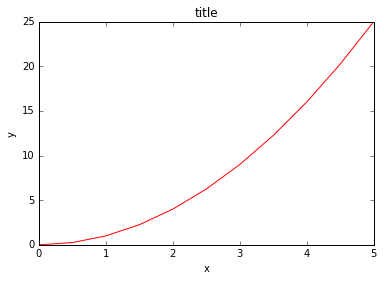

In [18]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

Если указать количество строк и столбцов, можно создать несколько графиков.

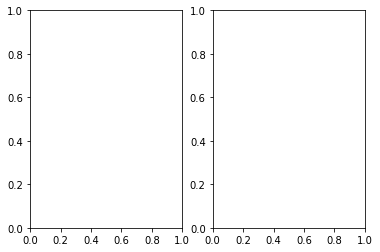

In [15]:
# Два пустых графика
fig, axes = plt.subplots(nrows=1, ncols=2)

In [20]:
# Axes — это просто список осей
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112c1af60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112cf6860>], dtype=object)

We can iterate through this array:

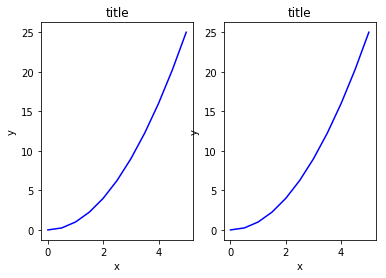

In [21]:
for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig

При построении несколько графиков оси часто накладываются друг на друга. Для утранения этой проблемы используйте методы **fig.tight_layout()** или **plt.tight_layout()**:

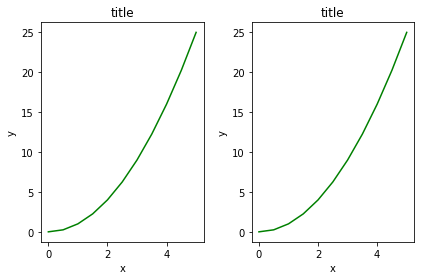

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
plt.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib позволяет задавать размер сторон графика и DPI при созданни фигуры. Для этого используйте следующие именованные аргументы:
* `figsize` принимает кортеж и двух чисел — ширины и высоты графика в дюймах.
* `dpi` — dots-per-inch. 

Например:

In [24]:
fig = plt.figure(figsize=(8,4), dpi=100)

То же самое можно передать в subplots.

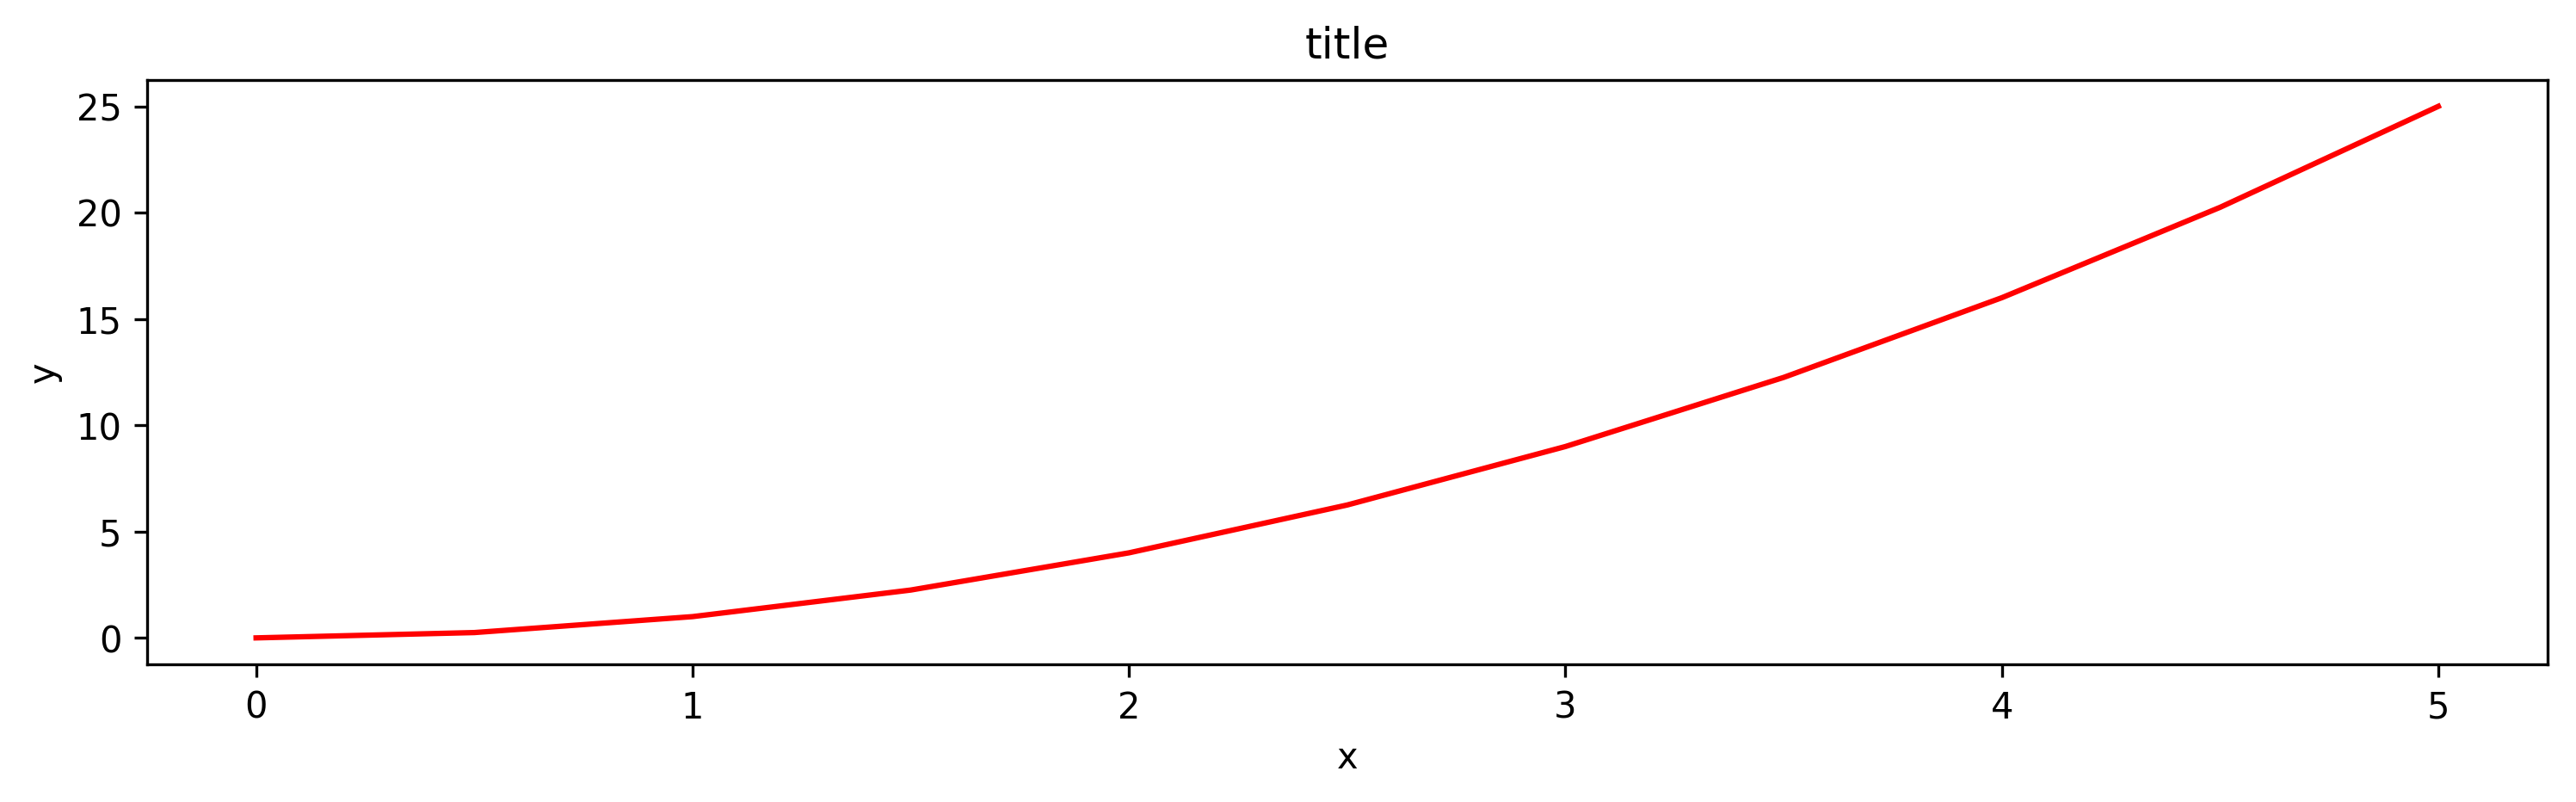

In [25]:
fig, axes = plt.subplots(figsize=(12,3), dpi=300)

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Сохранение графиков
Можно сохранять графики в форматах PNG, JPG, EPS, SVG, PGF и PDF. 

Для сохранения графика надо использовать метод `savefig` класса `Figure`:

In [69]:
fig.savefig("filename.png", dpi=200)

____
## Легенды, подписи осей, заголовки

**Заголовки графиков**

In [26]:
ax.set_title("title");

**Подписи осей**

In [27]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Легенды

При построении графиков можно указывать аргумент **label="label text"**, и указанные в нем подписи будут отображаться как подписи легенд и использовании метода **legend**: 

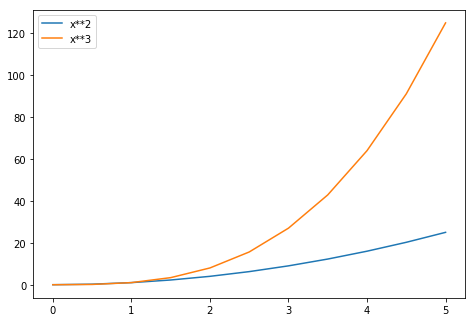

In [28]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

Легенду можно располагать в различных местах графиков, подробнее в [документации](http://matplotlib.org/users/legend_guide.html#legend-location).

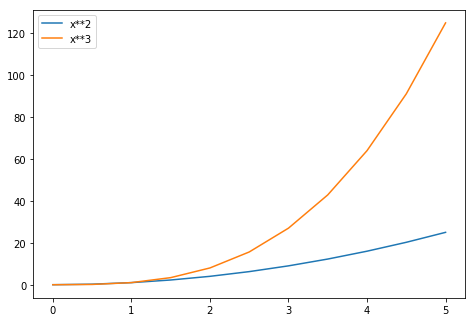

In [32]:
ax.legend(loc=1)  # upper right
ax.legend(loc=2)  # upper left
ax.legend(loc=3)  # lower left
ax.legend(loc=4)  # lower right

ax.legend(loc=0)  # оптимальное местоположение
fig

## Установка цвета, толщины и типа линий

### Стиль MatLab

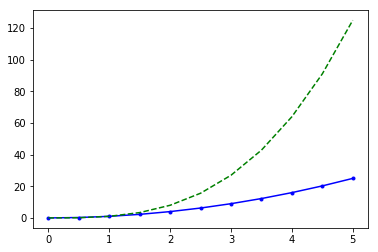

In [33]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-')  # Синяя линяя, точка пунктир
ax.plot(x, x**3, 'g--')  # Зелёна пунктирная линия

### Указание цветов в переметре color=  и alpha

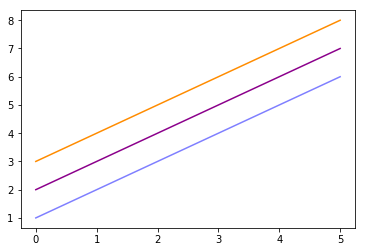

In [35]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # Полупрозрачная линия
ax.plot(x, x+2, color="#8B008B")        # RGB
ax.plot(x, x+3, color="#FF8C00")        # RGB

### Стили линии и маркеров

Для изменения толщины линии используется ключевое слово `linewidth` или `lw`. Стиль линии задаётся аргументами `linestyle` или `ls`:

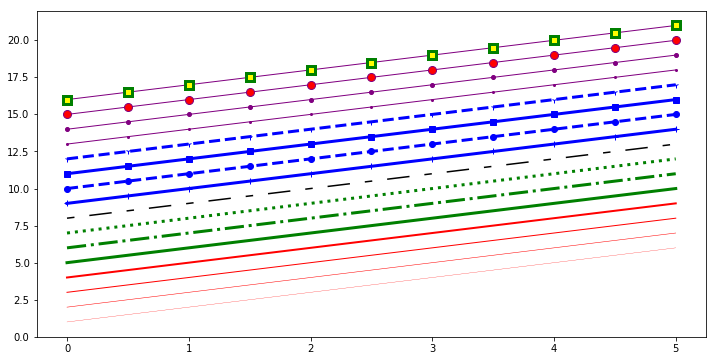

In [37]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# Возможные варианты ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# Кастомная пунктирная линия
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # формат: длина линия, длина пропуска, ...

# Возможные маркеры: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# Размер и цвет маркеров
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

## Диапазон значений графика

Диапазон можно изменять при помощи методов `set_ylim`, `set_xlim` и `axis('tight')` :

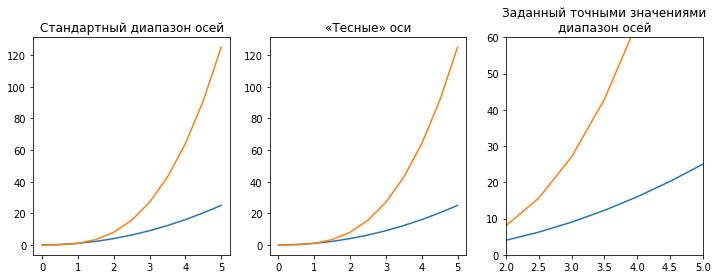

In [40]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("Стандартный диапазон осей")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("«Тесные» оси")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("Заданный точными значениями\nдиапазон осей");

# Другие типы графиков
При помощи matplotlib можно создавать барплоты, гистограммы, точечные диаграммы и много ещё чего. Намного проще создавать из с использованием seaborn, но можно обойтись и чистым matplotlib:

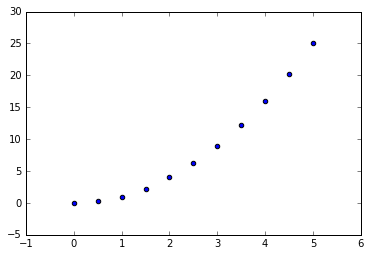

In [60]:
plt.scatter(x,y)

(array([ 14.,  11.,   9.,  12.,   6.,   7.,  13.,  13.,   6.,   9.]),
 array([  28. ,  123.5,  219. ,  314.5,  410. ,  505.5,  601. ,  696.5,
         792. ,  887.5,  983. ]),
 <a list of 10 Patch objects>)

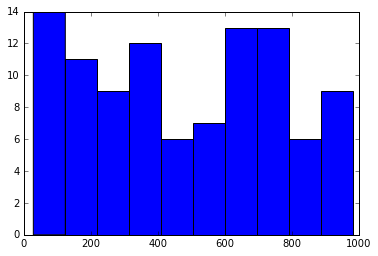

In [65]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

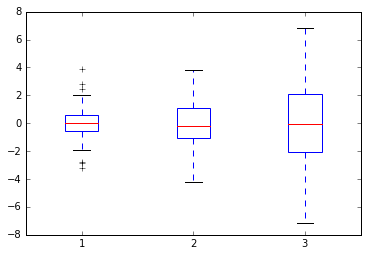

In [69]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

## Материалы для самостоятельного изучения

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
